For my first analysis, I want to find out whats the distribution of resale prices of HDB flats. I will be conducting this analysis by using the most recent dataset of the resale flats.

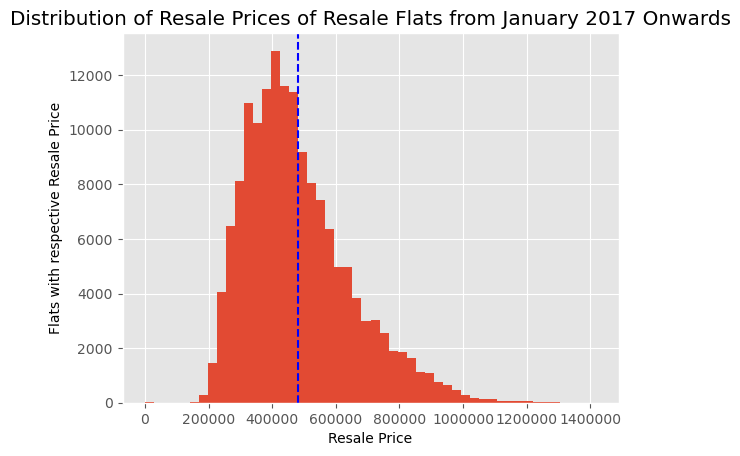

In [70]:
import numpy as np
import matplotlib.pyplot as plt


data = np.genfromtxt("./datasets/resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv",
                     dtype = ['U10', 'U20',  'U10',  'i8', 'U50', 'U10',  'i4',  'U20', 'i8',  'U20',  'i8'], delimiter=",",names=True)
price = data[:]["resale_price"]

plt.title('Distribution of Resale Prices of Resale Flats from January 2017 Onwards')
plt.ylabel('Flats with respective Resale Price')
plt.xlabel("Resale Price")
plt.style.use("ggplot")
plt.hist(price, bins =50)
plt.ticklabel_format(style='plain', axis='x')
avg_price = price.mean()
plt.axvline(avg_price, color='b', linestyle='--', label="Mean")
#
plt.show()

In [ ]:

# unique_town = np.unique(data[:]["town"])
# avg_price = []
# for i in unique_town:
#     indices = np.where(town == i)
#     tem_avg = np.mean(data[indices]['resale_price'])
#     tem_avg = int(tem_avg)
#     avg_price.append(tem_avg)

# summary = np.vstack((unique_town,avg_price)).T
# sort_summary = summary[summary[:,1].argsort()]
# bot_3 = sort_summary[:3]
# print(bot_3[1])


In Analysis 2, i will be determining the trend of increase in rent prices over every 5 year interval by using the median rent and flat type as my basis of comparison. There are some considerations that are left out in this analysis, mainly the location of said housing which could be a factor in determing the median rent.

In [42]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

data = np.genfromtxt('./datasets/median-rent-by-town-and-flat-type.csv', dtype = ['U32','U32','U32','i8'], delimiter=",", names = True, missing_values=['na','-'], filling_values= 0 )
data2007 = data[1140:1770]
data2012 = data[4265:4889]
data2017 = data[7377:8001]
data2022 = data[10497:]
print(data2022)
# may need to revisit analysis



[('2022-Q1', 'ANG MO KIO     ', '1-RM',    0)
 ('2022-Q1', 'ANG MO KIO     ', '2-RM',    0)
 ('2022-Q1', 'ANG MO KIO     ', '3-RM', 1900)
 ('2022-Q1', 'ANG MO KIO     ', '4-RM', 2350)
 ('2022-Q1', 'ANG MO KIO     ', '5-RM', 2600)
 ('2022-Q1', 'ANG MO KIO     ', 'EXEC',    0)
 ('2022-Q1', 'BEDOK          ', '1-RM',    0)
 ('2022-Q1', 'BEDOK          ', '2-RM',    0)
 ('2022-Q1', 'BEDOK          ', '3-RM', 1900)
 ('2022-Q1', 'BEDOK          ', '4-RM', 2200)
 ('2022-Q1', 'BEDOK          ', '5-RM', 2500)
 ('2022-Q1', 'BEDOK          ', 'EXEC', 2550)
 ('2022-Q1', 'BISHAN         ', '1-RM',    0)
 ('2022-Q1', 'BISHAN         ', '2-RM',    0)
 ('2022-Q1', 'BISHAN         ', '3-RM', 2130)
 ('2022-Q1', 'BISHAN         ', '4-RM', 2500)
 ('2022-Q1', 'BISHAN         ', '5-RM', 2700)
 ('2022-Q1', 'BISHAN         ', 'EXEC',    0)
 ('2022-Q1', 'BUKIT BATOK    ', '1-RM',    0)
 ('2022-Q1', 'BUKIT BATOK    ', '2-RM',    0)
 ('2022-Q1', 'BUKIT BATOK    ', '3-RM', 1900)
 ('2022-Q1', 'BUKIT BATOK    ', '4